# <center> ESTATÍSTICA APLICADA </center>

# <center>  Projeto 2 </center>

# <center>  José Silvestre da Silva Galvão </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df_police = pd.read_csv("C:/Users/joses/Dropbox/PC/Downloads/police.csv", encoding='unicode_escape')
df_police


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [3]:
df_weather = pd.read_csv("C:/Users/joses/Dropbox/PC/Downloads/weather.csv", encoding='unicode_escape')
df_weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Questão 1

### A)

Usando o len index(representando as linhas) e um len columns (representando as colunas), temos o número exato de linhas e colunas do data frame police.

In [4]:
print("Linhas: ",len(df_police.index))
print("Colunas: ",len(df_police.columns))

Linhas:  91741
Colunas:  15


### B)

Usando o metado isna, temos os dados faltosos e ao usar o sum esses dados são contabilizados, sendo assim:

In [5]:
df_police.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

### C)

Usando o .drop(), podemos excluir as colunas do dataframe e para confimar a exclusão logo abaixo está o df_police sem as colunas excluídas.

In [6]:
df_police.drop(['county_name','state'], axis=1, inplace=True)

In [7]:
df_police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


### D)

Com o uso do .dropna(), pode-se fazer a exclusão de dados faltosos no dataframe.

In [8]:
df_police = df_police.dropna(subset=['driver_gender'])

### E)

A variável search_conducted é do tipo boleano, enquanto is_arrested e district são objects.

In [9]:
df_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


### F)

Primeiro irei concatenar as duas colunas e depois transforma a unica coluna no tipo datetime.

In [10]:
df_police['stop_datetime'] = df_police["stop_date"] + " "+ df_police["stop_time"]
df_police['stop_datetime']=df_police['stop_datetime'].astype('datetime64')
df_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           86536 non-null  object        
 1   stop_time           86536 non-null  object        
 2   driver_gender       86536 non-null  object        
 3   driver_race         86536 non-null  object        
 4   violation_raw       86536 non-null  object        
 5   violation           86536 non-null  object        
 6   search_conducted    86536 non-null  bool          
 7   search_type         3307 non-null   object        
 8   stop_outcome        86536 non-null  object        
 9   is_arrested         86536 non-null  object        
 10  stop_duration       86536 non-null  object        
 11  drugs_related_stop  86536 non-null  bool          
 12  district            86536 non-null  object        
 13  stop_datetime       86536 non-null  datetime64

<ipython-input-10-7bc6cbd389cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police['stop_datetime'] = df_police["stop_date"] + " "+ df_police["stop_time"]
<ipython-input-10-7bc6cbd389cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police['stop_datetime']=df_police['stop_datetime'].astype('datetime64')


### G)

Usando o set_index() posso colocar qualquer coluna do dataset como indez do dataframe.

In [11]:
df_police = df_police.set_index('stop_datetime')

In [12]:
df_police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Questão 2

### A)

Com o uso do .value_counts() dá para ver que a infração mais cometida é a speeding(velocidade) e a menos cometida seat belt(cinto de segurança).

In [13]:
df_police['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

### B)

Observando a tabela abaixo, é possivel observar que o sexo masculino comente um maior número de infrações que o sexo faminino. 

In [14]:
fi=df_police[['violation','driver_gender']].value_counts()
fr=df_police[['violation','driver_gender']].value_counts(normalize=True)

In [15]:
fi=fi.sort_index(ascending=False)
fr=(fr*100).sort_index(ascending=False)

In [16]:
dist = pd.concat([fi,fr],axis=1)
dist.columns = ['fi', 'fr']
dist

fi         fr
violation           driver_gender                  
Speeding            M              32777  37.876722
                    F              15646  18.080337
Seat belt           M               2278   2.632430
                    F                578   0.667930
Registration/plates M               2647   3.058843
                    F               1056   1.220301
Other               M               3702   4.277988
                    F                707   0.817001
Moving violation    M              12938  14.951003
                    F               3286   3.797264
Equipment           M               8420   9.730055
                    F               2501   2.890127

### C)

Usando o .plot.bar() é possivel fazer o gráfico da tabela de contingência.

array([<AxesSubplot:title={'center':'fi'}, xlabel='violation,driver_gender'>,
       <AxesSubplot:title={'center':'fr'}, xlabel='violation,driver_gender'>],
      dtype=object)

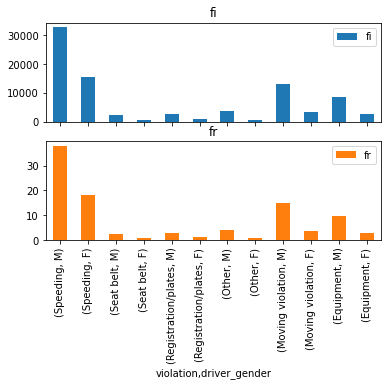

In [17]:
dist.plot.bar(subplots=True)

### D)

Mais uma vez, o sexo masculino tem maior número em todos os indices. Tanto em Warning quanto em citation os homens estão na frente.

In [18]:
fi=df_police[['stop_outcome','driver_gender']].value_counts()
fr=df_police[['stop_outcome','driver_gender']].value_counts(normalize=True)

In [19]:
fi=fi.sort_index(ascending=False)
fr=(fr*100).sort_index(ascending=False)

In [20]:
dist = pd.concat([fi,fr],axis=1)
dist.columns = ['fi', 'fr']
dist

fi         fr
stop_outcome     driver_gender                  
Warning          M               3651   4.219053
                 F               1485   1.716049
No Action        M                423   0.488814
                 F                201   0.232273
N/D              M                439   0.507303
                 F                168   0.194139
Citation         M              55840  64.528058
                 F              21251  24.557410
Arrest Passenger M                230   0.265785
                 F                113   0.130581
Arrest Driver    M               2179   2.518027
                 F                556   0.642507

### E)

De acordo com a analise da tabela abaixo é perceptivel que o sexo masculino é revistado com uma frequencia maior que o sexo feminino.

In [21]:
dist=df_police[['search_conducted','driver_gender']].astype('object').value_counts()

In [22]:
dist

search_conducted  driver_gender
False             M                59911
                  F                23318
True              M                 2851
                  F                  456
dtype: int64

### F)

Fazendo as operações abaixou resultou em em revista para 86,2% para motoristas masculinos e 13,7 % para motoristas do sexo feminino.

In [23]:
taxa = dist[1]
taxa.sum()

3307

In [24]:
taxmasculino = dist[1][0]
taxmasculino

2851

In [25]:
taxfeminino = dist[1][1]
taxfeminino

456

In [26]:
distmasculino = taxmasculino * 100/taxa.sum()
distmasculino

86.21106743271848

In [27]:
distfeminino = taxfeminino * 100/taxa.sum()
distfeminino

13.788932567281524

### G)

Em todas as hipóteses o sexo feminino tem uma taxa menor.

In [28]:
gp = df_police.groupby(['driver_gender','violation']).size().unstack(1)


In [29]:
gp.loc['Total',:]= gp.sum(axis=0)
gp.loc[:,'Total'] = gp.sum(axis=1)

In [30]:
gp

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
driver_gender,,,,,,,
F,2501.0,3286.0,707.0,1056.0,578.0,15646.0,23774.0
M,8420.0,12938.0,3702.0,2647.0,2278.0,32777.0,62762.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


## Questão 3

### A)

Para fazer a média usa-se o metodo .mean()

In [31]:
df_police['is_arrested'].mean()


0.0355690117407784

### B)

In [32]:
df_police = df_police.reset_index()


In [33]:
df_police['hourly_arrest_rate'] = df_police.groupby(by=df_police['stop_datetime'].dt.hour, sort=False)['is_arrested'].sum()

In [34]:
df = df_police.dropna(subset=["hourly_arrest_rate"])

In [35]:
df

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,hourly_arrest_rate
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,248.0
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,262.0
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,163.0
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,64.0
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,12.0
5,2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,8.0
6,2005-03-29 21:55:00,2005-03-29,21:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,43.0
7,2005-04-04 21:25:00,2005-04-04,21:25,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1,57.0
8,2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,108.0
9,2005-07-14 19:55:00,2005-07-14,19:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,162.0


### C)

<AxesSubplot:>

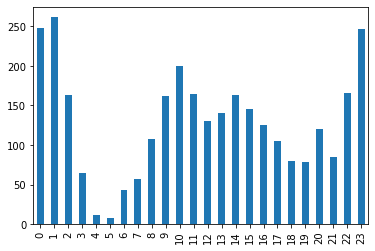

In [36]:
df['hourly_arrest_rate'].plot.bar()

### D)

In [37]:
df_police['stop_date'] = pd.to_datetime(df_police['stop_date'])


In [38]:
Annual_drug_rate = df_police.groupby(df_police['stop_date'].dt.year)['drugs_related_stop'].sum()

<AxesSubplot:xlabel='stop_date'>

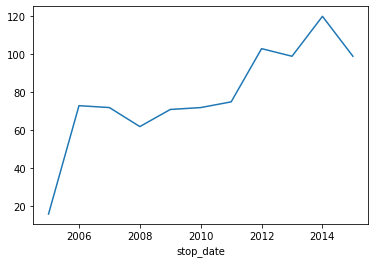

In [39]:
Annual_drug_rate.plot()

### E)

In [40]:
Annual_search_rate = df_police.groupby(df_police['stop_date'].dt.year)['search_conducted'].sum()

In [41]:
Annual_search_rate

stop_date
2005    121
2006    420
2007    398
2008    333
2009    358
2010    320
2011    275
2012    349
2013    227
2014    276
2015    230
Name: search_conducted, dtype: int64

In [42]:
Annual_drugsearch_rate = pd.concat([Annual_drug_rate, Annual_search_rate], axis=1)

<AxesSubplot:xlabel='stop_date'>

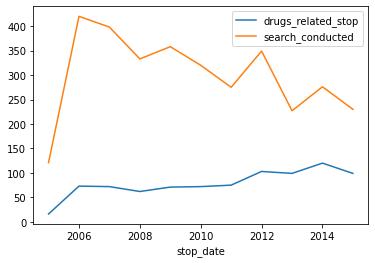

In [43]:
Annual_drugsearch_rate.plot()

### F)

In [44]:
gp4 = df_police.groupby(['district','violation']).size().unstack(1)

In [45]:
gp4.loc['Total',:]= gp4.sum(axis=0)
gp4.loc[:,'Total'] = gp4.sum(axis=1)

In [46]:
gp4

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
district,,,,,,,
Zone K1,672.0,1254.0,290.0,120.0,NaN,5960.0,8296.0
Zone K2,2061.0,2962.0,942.0,768.0,481.0,10448.0,17662.0
Zone K3,2302.0,2898.0,705.0,695.0,638.0,12322.0,19560.0
Zone X1,296.0,671.0,143.0,38.0,74.0,1119.0,2341.0
Zone X3,2049.0,3086.0,769.0,671.0,820.0,8779.0,16174.0
Zone X4,3541.0,5353.0,1560.0,1411.0,843.0,9795.0,22503.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


<AxesSubplot:xlabel='district'>

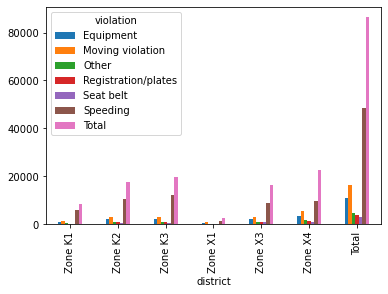

In [47]:
gp4.plot.bar()

## Questão 4

### A)

In [48]:
df_weather = df_weather[['TMIN','TAVG','TMAX']].describe()
df_weather

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


Média:

In [49]:
df_weather['TMIN'].mean()

535.188092438959

In [50]:
df_weather['TAVG'].mean()

192.54046622096283

In [51]:
df_weather['TMAX'].mean()

549.9335156226367

Moda:

In [52]:
df_weather['TMIN'].mode()

0      -5.000000
1      17.020298
2      30.000000
3      43.484441
4      44.000000
5      58.000000
6      77.000000
7    4017.000000
dtype: float64

In [53]:
df_weather['TAVG'].mode()

0       6.000000
1      17.830714
2      39.000000
3      52.493016
4      54.000000
5      68.000000
6      86.000000
7    1217.000000
dtype: float64

In [54]:
df_weather['TMAX'].mode()

0      15.000000
1      18.199517
2      47.000000
3      61.268608
4      62.000000
5      77.000000
6     102.000000
7    4017.000000
dtype: float64

Mediana:

In [55]:
df_weather['TMIN'].median()

43.742220562608914

In [56]:
df_weather['TAVG'].median()

53.24650780608053

In [57]:
df_weather['TMAX'].median()

61.63430420711974

In [58]:
df_weather.describe()

,TMIN,TAVG,TMAX
count,8.000000,8.000000,8.000000
mean,535.188092,192.540466,549.933516
std,1407.084789,414.742743,1401.202040
min,-5.000000,6.000000,15.000000
25%,26.755075,33.707679,39.799879
50%,43.742221,53.246508,61.634304
75%,62.750000,72.500000,83.250000
max,4017.000000,1217.000000,4017.000000


<AxesSubplot:>

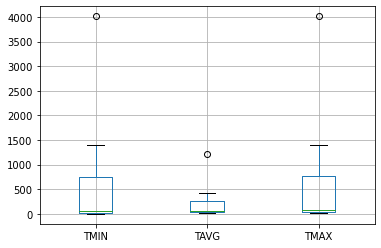

In [59]:
df_weather.describe().boxplot(column=['TMIN', 'TAVG', 'TMAX'])